In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def get_dfs(experiment_number: int, pos_number: int) -> pd.DataFrame:
    log_df = pd.read_csv(f'results/experiment_{experiment_number}/pos{pos_number}_logs.csv', sep=';', skiprows=5)
    odom_df = pd.read_csv(f'results/experiment_{experiment_number}/pos{pos_number}_odometry.csv', sep=',', names=['s','ns','x', 'y','theta'])
    log_df['time'] = log_df['time'] - log_df['time'][0]
    return log_df, odom_df

log_df, odom_df = get_dfs(1, 1)
log_df.head()

,time,side,closest_point_dist,relative_dist,angular_vel,linear_vel
0,0.000000,right,2.7554,-1.7554,-4.0911,0.2444
1,0.002789,right,2.7554,-1.7554,-4.0911,0.2444
2,0.018969,right,2.7554,-1.7554,-4.0911,0.2444
3,0.022429,right,2.7554,-1.7554,-4.0911,0.2444
4,0.032741,right,2.7555,-1.7555,-4.0912,0.2444


In [8]:
odom_df.head()

,s,ns,x,y,theta
0,73,261000000,-0.449587,0.002030,-29.772139
1,73,271000000,-0.449587,0.002030,-29.772167
2,73,281000000,-0.449585,0.002031,-29.772144
3,73,291000000,-0.449547,0.001952,-29.772018
4,73,301000000,-0.449432,0.001719,-29.771799


In [10]:
def get_lap_time(df: pd.DataFrame) -> float:
    return df['time'][len(df['time'])-1] - df['time'][0]

In [14]:
def get_metrics_for_experiments(experiments: [int], num_pos: int) -> None:
    for experiment in experiments:
        lap_times = []
        avg_linear_velocity = []
        avg_angular_velocity = []
        for i in range(1, num_pos+1):
            log_df, odom_df = get_dfs(experiment, i)
            lap_times.append(get_lap_time(log_df))
            avg_linear_velocity.append(np.mean(log_df['linear_vel']))
            avg_angular_velocity.append(np.mean(abs(log_df['angular_vel'])))
        print(f'Experiment {experiment}: {np.mean(lap_times):.4f} +- {np.std(lap_times):4f} s, {np.mean(avg_linear_velocity):.4f} +- {np.std(avg_linear_velocity):.4f} m/s, {np.mean(avg_angular_velocity):.4f} +- {np.std(avg_angular_velocity):.4f} rad/s')
get_metrics_for_experiments([1], 3)

Experiment 1: 81.5782 +- 4.501095 s, 0.9547 +- 0.0125 m/s, 0.4643 +- 0.0873 rad/s


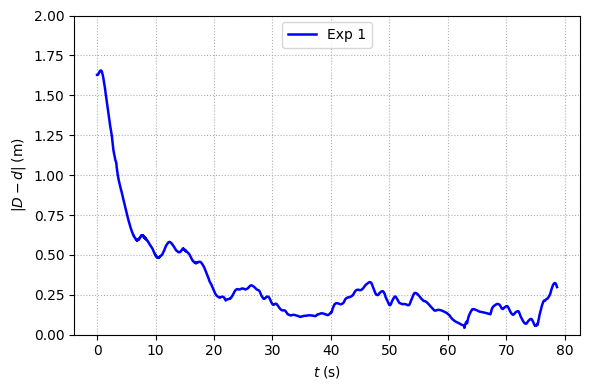

In [57]:
def plot_stability_for_experiments(experiments: [int], num_pos: int) -> None:
    plt.figure(figsize=(6, 4))

    def plot_stability(dfs: [pd.DataFrame], color='blue', linestyle='-') -> None:
        average_relative_dist_df = dfs[0].copy()
        average_relative_dist_df['relative_dist'] = sum([abs(dfs[i]['relative_dist']) for i in range(len(dfs))]) / len(dfs)

        plt.plot(average_relative_dist_df['time'], average_relative_dist_df['relative_dist'],
            linestyle=linestyle,
            linewidth=1.8,
            color=color,
            label=r'Exp 1'
        )

    for experiment in experiments:
        dfs_to_plot = [get_dfs(experiment, i)[0] for i in range(1, num_pos+1)]
        plot_stability(dfs_to_plot)

    plt.xlabel(r'$t\;(\text{s})$')
    plt.ylabel(r'$|D-d|\;(\text{m})$')
    plt.ylim(0, 2)
    plt.grid(linestyle='dotted')
    plt.legend(ncol=2, loc=9) # 9 means top center
    plt.tight_layout()
plot_stability_for_experiments([1], 3)

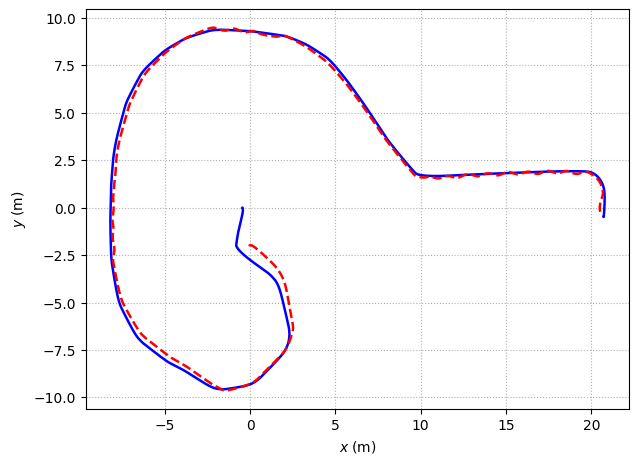

In [16]:
#plt.figure(figsize=(6, 4))
def plot_odometry(df: pd.DataFrame, color='blue', linestyle='-') -> None:
    plt.plot(df['x'], df['y'], color=color, linewidth=1.8, linestyle=linestyle)
plt.xlabel(r'$x\;(\text{m})$')
plt.ylabel(r'$y\;(\text{m})$')
plt.grid(linestyle='dotted')
plt.tight_layout()
plot_odometry(odom_df)
plot_odometry(get_dfs(1, 2)[1], color='red', linestyle='--')